In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import mpl_toolkits
import seaborn as sns
import geoviews as gv
from cartopy import crs
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [126]:
data = pd.read_csv('train.csv')

In [127]:
data_2 = pd.read_csv('train.csv').set_index('Neighborhood')

In [128]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [130]:
list(data.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

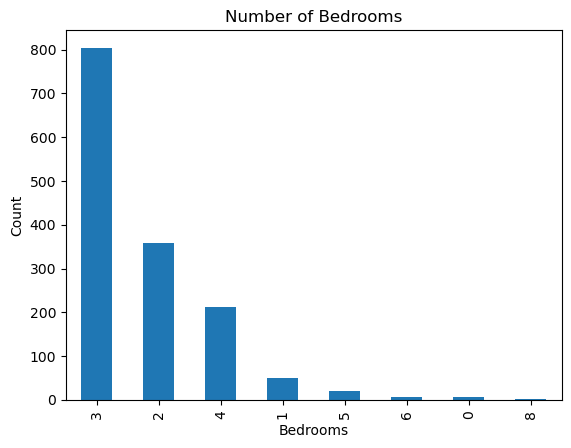

In [131]:
data['BedroomAbvGr'].value_counts().plot(kind = 'bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [132]:
neighborhoods = data['Neighborhood']

neighborhood_list = []

for item in neighborhoods: 
    if item not in neighborhood_list: 
        neighborhood_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in neighborhood_list: 
    print(item) 

Unique elements of the list using append():

CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


In [133]:
location = pd.DataFrame([
    [42.02297950984824, -93.65152654913278],
    [42.042000893296645, -93.64912506935033],
    [42.02825609621738, -93.60712917334578],
    [42.05170602704498, -93.65348367637668],
    [42.04800874709323, -93.64673069640803],
    [41.99148167944763, -93.60101240170191],
    [42.05001055342493, -93.63947159150143],
    [42.032013355552714, -93.60782487898516],
    [42.05358348044627, -93.63422595783031],
    [42.03011708850785, -93.61469026607243],
    [42.03135203546887, -93.62284763778692],
    [42.060422245784146, -93.64931622302471],
    [42.032809171167926, -93.68233321354305],
    [42.023008755265245, -93.61584581633127],
    [41.99262385349385, -93.60264411706983],
    [42.02285117068951, -93.66490201221659],
    [41.994786894619374, -93.64910832796583],
    [42.05981966227922, -93.63809693233266],
    [42.059486682919214, -93.63338278639034],
    [42.024379341453866, -93.68154180861359],
    [42.06184560765777, -93.64283371698507],
    [42.053889562979776, -93.63028733340965],
    [42.052974454012464, -93.6288454993666],
    [42.02661808556885, -93.64656553597423],
    [42.00962087635582, -93.64661538683885]
], columns=('Lat','Lon'), index=[neighborhood_list])

location_df = location.rename_axis('Neighborhood')

location_df


,Lat,Lon
Neighborhood,,
CollgCr,42.022980,-93.651527
Veenker,42.042001,-93.649125
Crawfor,42.028256,-93.607129
NoRidge,42.051706,-93.653484
Mitchel,42.048009,-93.646731
Somerst,41.991482,-93.601012
NWAmes,42.050011,-93.639472
OldTown,42.032013,-93.607825
BrkSide,42.053583,-93.634226


In [134]:
data_3 = data_2.join(location_df.set_index(location_df.index), on= 'Neighborhood')
data_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Lat,Lon
Neighborhood,,,,,,,,,,,,,,,,,,,,,
CollgCr,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,42.022980,-93.651527
Veenker,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,42.042001,-93.649125
CollgCr,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,42.022980,-93.651527
Crawfor,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,42.028256,-93.607129
NoRidge,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,42.051706,-93.653484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gilbert,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,42.059820,-93.638097
NWAmes,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,42.050011,-93.639472
Crawfor,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,42.028256,-93.607129


/Users/nevynbrown/opt/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

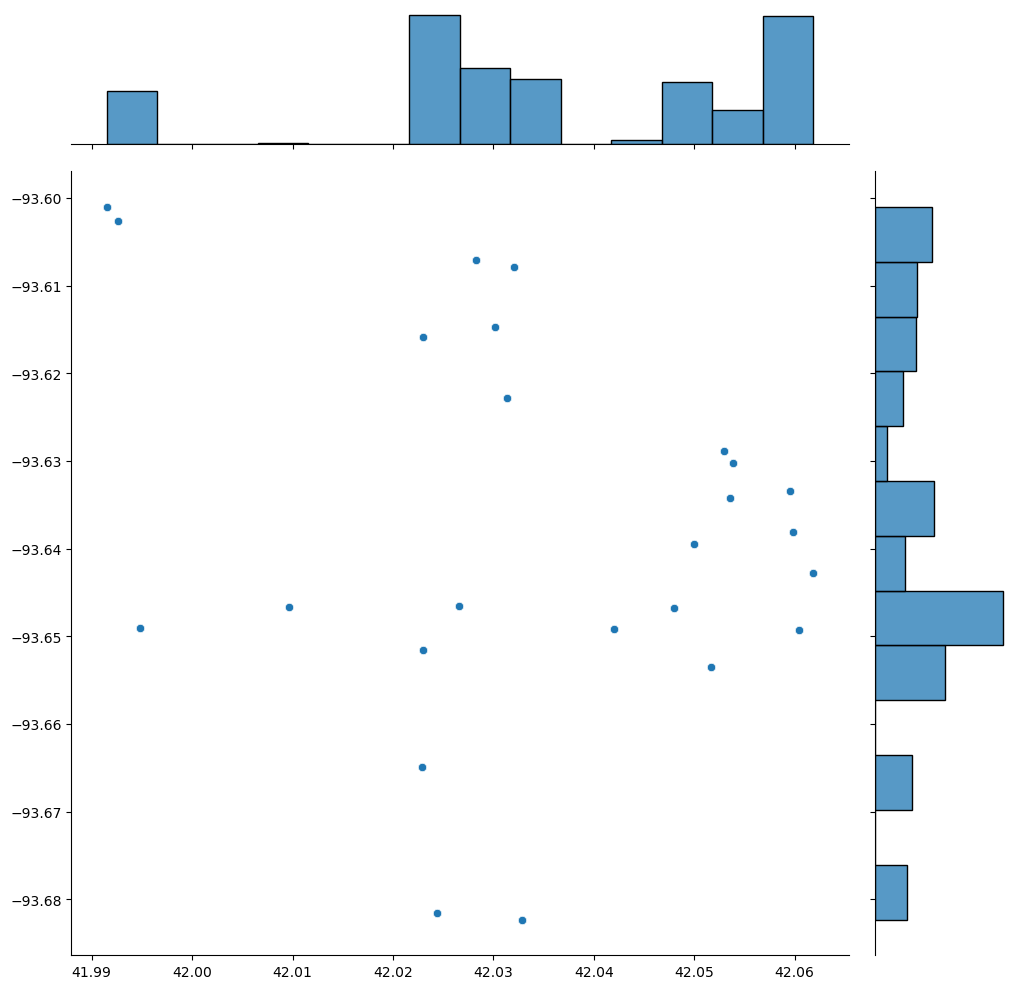

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [135]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data_3.Lat.values, y=data_3.Lon.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0, 0.5, 'Sq.Ft')

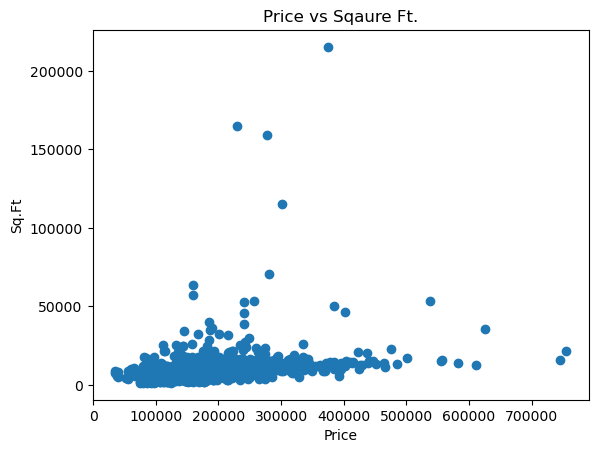

In [136]:
plt.scatter(data_3.SalePrice,data_3.LotArea)
plt.title('Price vs Sqaure Ft.')
plt.xlabel('Price')
plt.ylabel('Sq.Ft')

Text(0, 0.5, 'Location (Longitude)')

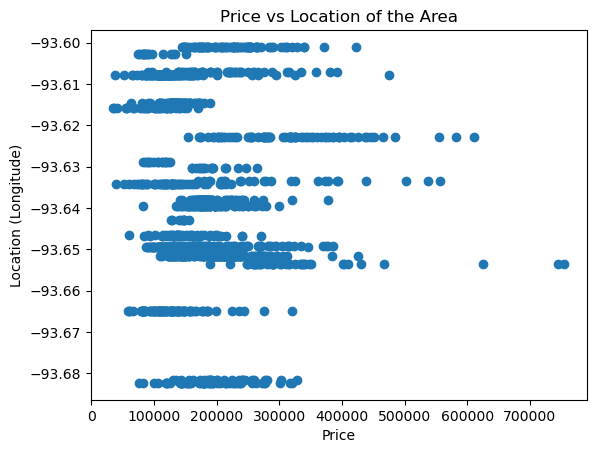

In [137]:
plt.scatter(data_3.SalePrice,data_3.Lon)
plt.title('Price vs Location of the Area')
plt.xlabel('Price')
plt.ylabel('Location (Longitude)')

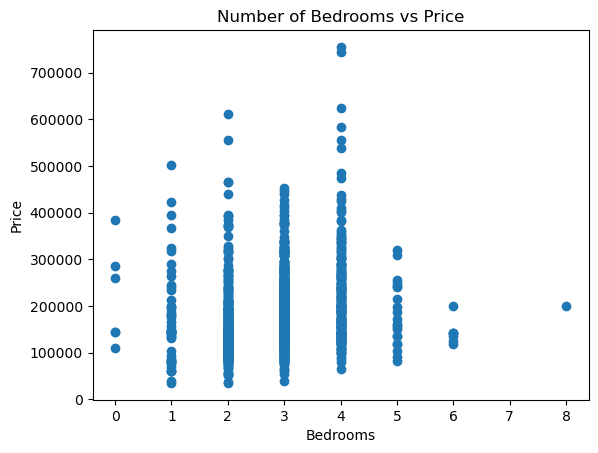

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [138]:
plt.scatter(data_3.BedroomAbvGr, data_3.SalePrice)
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine

In [139]:
reg= LinearRegression()

In [140]:
data_4 = data_3[[
'SalePrice',
'MSZoning',
'LotArea',
'Utilities',
'BldgType',
'HouseStyle',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'Exterior1st',
'ExterCond',
'TotalBsmtSF',
'Heating',
'CentralAir',
'Electrical',
'1stFlrSF',
'2ndFlrSF',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'GarageArea',
'PavedDrive',
'PoolArea',
'YrSold'
]]
data_4

,SalePrice,MSZoning,LotArea,Utilities,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,PavedDrive,PoolArea,YrSold
Neighborhood,,,,,,,,,,,,,,,,,,,,,
CollgCr,208500,RL,8450,AllPub,1Fam,2Story,5,2003,2003,VinylSd,...,856,854,2,1,3,1,548,Y,0,2008
Veenker,181500,RL,9600,AllPub,1Fam,1Story,8,1976,1976,MetalSd,...,1262,0,2,0,3,1,460,Y,0,2007
CollgCr,223500,RL,11250,AllPub,1Fam,2Story,5,2001,2002,VinylSd,...,920,866,2,1,3,1,608,Y,0,2008
Crawfor,140000,RL,9550,AllPub,1Fam,2Story,5,1915,1970,Wd Sdng,...,961,756,1,0,3,1,642,Y,0,2006
NoRidge,250000,RL,14260,AllPub,1Fam,2Story,5,2000,2000,VinylSd,...,1145,1053,2,1,4,1,836,Y,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gilbert,175000,RL,7917,AllPub,1Fam,2Story,5,1999,2000,VinylSd,...,953,694,2,1,3,1,460,Y,0,2007
NWAmes,210000,RL,13175,AllPub,1Fam,1Story,6,1978,1988,Plywood,...,2073,0,2,0,3,1,500,Y,0,2010
Crawfor,266500,RL,9042,AllPub,1Fam,2Story,9,1941,2006,CemntBd,...,1188,1152,2,0,4,1,252,Y,0,2010


In [141]:
data_4['YearBuilt'].max()

2010

In [142]:
housestyle = data_4['HouseStyle']

housestyle_list = []

for item in housestyle: 
    if item not in housestyle_list: 
        housestyle_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in housestyle_list: 
    print(item) 

Unique elements of the list using append():

2Story
1Story
1.5Fin
1.5Unf
SFoyer
SLvl
2.5Unf
2.5Fin


In [143]:
zoning = data_4['MSZoning']

zoning_list = []

for item in zoning: 
    if item not in zoning_list: 
        zoning_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in zoning_list: 
    print(item) 

Unique elements of the list using append():

RL
RM
C (all)
FV
RH


In [144]:
utilities = data_4['Utilities']

utilities_list = []

for item in utilities : 
    if item not in utilities_list: 
        utilities_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in utilities_list: 
    print(item) 

Unique elements of the list using append():

AllPub
NoSeWa


In [145]:
building = data_4['BldgType']

building_list = []

for item in building: 
    if item not in building_list: 
        building_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in building_list: 
    print(item)

Unique elements of the list using append():

1Fam
2fmCon
Duplex
TwnhsE
Twnhs


In [146]:
exterior = data_4['Exterior1st']

exterior_list = []

for item in exterior: 
    if item not in exterior_list: 
        exterior_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in exterior_list: 
    print(item)

Unique elements of the list using append():

VinylSd
MetalSd
Wd Sdng
HdBoard
BrkFace
WdShing
CemntBd
Plywood
AsbShng
Stucco
BrkComm
AsphShn
Stone
ImStucc
CBlock


In [147]:
external_condition = data_4['ExterCond']

condition_list = []

for item in external_condition: 
    if item not in condition_list: 
        condition_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in condition_list: 
    print(item)

Unique elements of the list using append():

TA
Gd
Fa
Po
Ex


In [148]:
heating = data_4['Heating']

heating_list = []

for item in heating: 
    if item not in heating_list: 
        heating_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in heating_list: 
    print(item)

Unique elements of the list using append():

GasA
GasW
Grav
Wall
OthW
Floor


In [149]:
air = data_4['CentralAir']

air_list = []

for item in air: 
    if item not in air_list: 
        air_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in air_list: 
    print(item)

Unique elements of the list using append():

Y
N


In [150]:
electrical = data_4['Electrical']

electrical_list = []

for item in electrical: 
    if item not in electrical_list: 
        electrical_list.append(item) 

print("Unique elements of the list using append():\n")    
for item in electrical_list: 
    print(item)

Unique elements of the list using append():

SBrkr
FuseF
FuseA
FuseP
Mix
nan


In [ ]:
labels = data_4['SalePrice']
def conv_columns(): 
    conv_yrbuilt = [1 if values == 2010 else 0 for values in data_4.YearBuilt],
    conv_yrremodel = [1 if values == 2010 else 0 for values in data_4.YearRemodAdd]
    conv_pave = [1 if values== 'Y' else 0 for values in data_4.PavedDrive]
    conv_utilities = [1 if values== 'AllPub' else 0 for values in data_4.Utilities]
    conv_air = [1 if values == 'Y' else 0 for values in data_4. CentralAir]
    
    data_4['YearBuilt'] = conv_yrbuilt
    data_4['YearRemodAdd'] = conv_yrremodel
    data_4['PavedDrive'] = conv_pave
    data_4['Utilities'] = conv_utilities
    data_4['CentralAir'] = conv_air
    
data_4['HouseStyle'] = data_4['HouseStyle'].replace('2Story',1) 
                                                       #'1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'},
                        #{1,2,3,4,5,6,7,8})
conv_zoning = data_4['MSZoning'].replace(['RL', 'RM', 'C (all)', 'FV', 'RH'],
                        [1,2,3,4,5], inplace = True)
conv_building = data_4['BldgType'].replace(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
                        [1,2,3,4,5], inplace=True)
conv_exterior = data_4['Exterior1st'].replace(['VinylSd','MetalSd','Wd Sdng','HdBoard','BrkFace','WdShing','CemntBd','Plywood','AsbShng','Stucco','BrkComm','AsphShn','Stone','ImStucc','CBlock'],
                        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)
conv_exterior_condition = data_4['ExterCond'].replace(['TA','Gd','Fa','Po','Ex'],
                        [1,2,3,4,5], inplace=True)
conv_heating = data_4['Heating'].replace(['GasA','GasW','Grav','Wall','OthW','Floor'],
                        [1,2,3,4,5,6], inplace=True)
conv_electrical = data_4['Electrical'].replace(['SBrkr','FuseF','FuseA','FuseP','Mix','nan'],
                        [1,2,3,4,5,0], inplace=True)

    

In [ ]:
data_4['YearBuilt'] = conv_yrbuilt
    data_4['YearRemodAdd'] = conv_yrremodel
    data_4['PavedDrive'] = conv_pave
    data_4['Utilities'] = conv_utilities
    data_4['CentralAir'] = conv_air
    data_4['HouseStyle'] = conv_housestyle
    data_4['MSZoning'] = conv_zoning
    data_4['BldgType'] = conv_building
    data_4['Exterior1st'] = conv_exterior
    data_4['ExterCond'] = conv_exterior_condition
    data_4['Heating'] = conv_heating
    data_4['Electrical'] = conv_electrical
    data_4['MSZoning'] = conv_zoning

In [151]:
data_4

,SalePrice,MSZoning,LotArea,Utilities,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,PavedDrive,PoolArea,YrSold
Neighborhood,,,,,,,,,,,,,,,,,,,,,
CollgCr,208500,RL,8450,AllPub,1Fam,2Story,5,2003,2003,VinylSd,...,856,854,2,1,3,1,548,Y,0,2008
Veenker,181500,RL,9600,AllPub,1Fam,1Story,8,1976,1976,MetalSd,...,1262,0,2,0,3,1,460,Y,0,2007
CollgCr,223500,RL,11250,AllPub,1Fam,2Story,5,2001,2002,VinylSd,...,920,866,2,1,3,1,608,Y,0,2008
Crawfor,140000,RL,9550,AllPub,1Fam,2Story,5,1915,1970,Wd Sdng,...,961,756,1,0,3,1,642,Y,0,2006
NoRidge,250000,RL,14260,AllPub,1Fam,2Story,5,2000,2000,VinylSd,...,1145,1053,2,1,4,1,836,Y,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gilbert,175000,RL,7917,AllPub,1Fam,2Story,5,1999,2000,VinylSd,...,953,694,2,1,3,1,460,Y,0,2007
NWAmes,210000,RL,13175,AllPub,1Fam,1Story,6,1978,1988,Plywood,...,2073,0,2,0,3,1,500,Y,0,2010
Crawfor,266500,RL,9042,AllPub,1Fam,2Story,9,1941,2006,CemntBd,...,1188,1152,2,0,4,1,252,Y,0,2010


In [ ]:
data_4['HouseStyle'] = data_4['HouseStyle'].replace(('1Story',1))

In [ ]:
data_4